*PARCIAL 1 VISION ARTIFICIAL- CONTEO DE TORNILLOS (SEBASTIAN- ORLANDO)*

*CARGA Y CONFIGURACION DE IMAGEN*

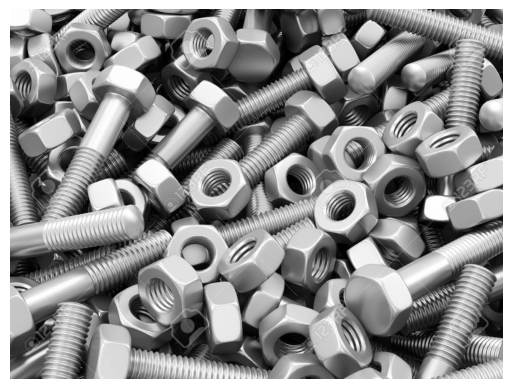

In [2]:
import cv2  
import numpy as np 
from matplotlib import pyplot as plt

# Leer la imagen original (RGB)
# Convertir a escala de grises
img1 = cv2.imread('img1.jpg')
img1_gray = cv2.cvtColor(img1, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen con matplotlib
plt.imshow(img1_gray, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.show()



*TAMAÑO Y TIPO DE IMAGENES*

In [3]:
print("Forma de la imagen original:", img1.shape)
print("Forma de la imagen en escala de grises:", img1_gray.shape)
print("Forma de la imagen binaria:", img1_binary.shape)

Forma de la imagen original: (975, 1300, 3)
Forma de la imagen en escala de grises: (975, 1300, 4)


NameError: name 'img1_binary' is not defined

*CONVERSION DE IMAGEN A DISTINTAS ESCALAS*

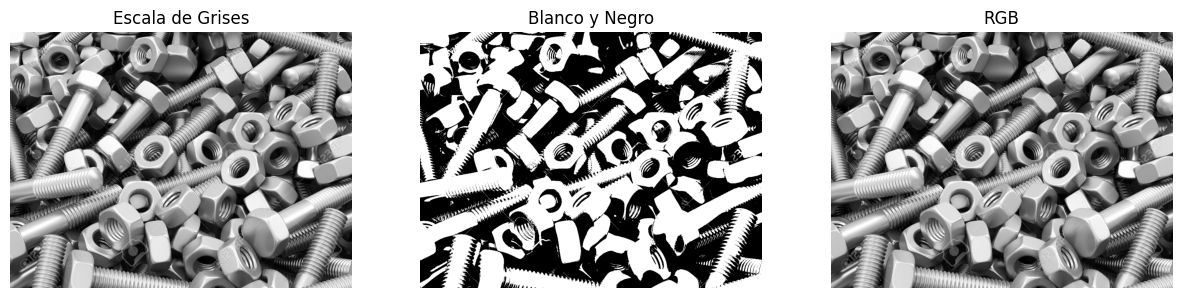

In [4]:
# UMBRAL DEFINIDO A 127 COMO STANDART
_,img1_binary = cv2.threshold(img1_gray,127,255, cv2.THRESH_BINARY)

# Mostrar las imágenes utilizando matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Escala de grises
axes[0].imshow(img1_gray, cmap='gray')
axes[0].set_title("Escala de Grises")
axes[0].axis('off')

# Blanco y negro (binaria)
axes[1].imshow(img1_binary, cmap='gray')
axes[1].set_title("Blanco y Negro")
axes[1].axis('off')

# Imagen RGB
axes[2].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[2].set_title("RGB")
axes[2].axis('off')

plt.show()


Conversión a imagen binaria (umbral fijo).



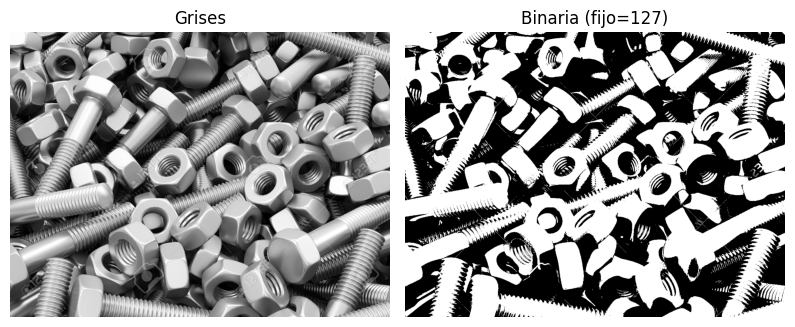

In [5]:
TH = 127 

# Umbral fijo normal (si los tornillos son más claros que el fondo)
_, bin_fijo = cv2.threshold(img1_gray, TH, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img1_gray, cmap='gray'); plt.title('Grises'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(bin_fijo, cmap='gray'); plt.title(f'Binaria (fijo={TH})'); plt.axis('off')
plt.tight_layout(); plt.show()

Binarización con umbral adaptativo.


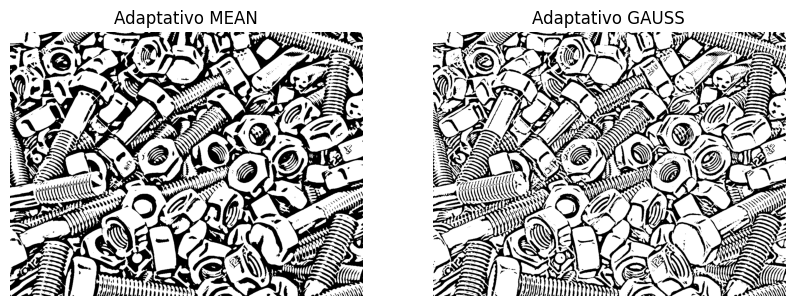

In [6]:
# Convertir correctamente a escala de grises
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado
gray_blur = cv2.GaussianBlur(img1_gray, (5,5), 0)

# Parámetros de la binarización adaptativa
blockSize = 31  # impar >= 3
C = 5           # constante

# Umbral adaptativo
bin_adapt_mean = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, blockSize, C
)

bin_adapt_gauss = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, blockSize, C
)

# Mostrar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(bin_adapt_mean, cmap='gray'); plt.title('Adaptativo MEAN'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(bin_adapt_gauss, cmap='gray'); plt.title('Adaptativo GAUSS'); plt.axis('off')
plt.show()


Operaciones Aritmeticas

Resta de imagenes


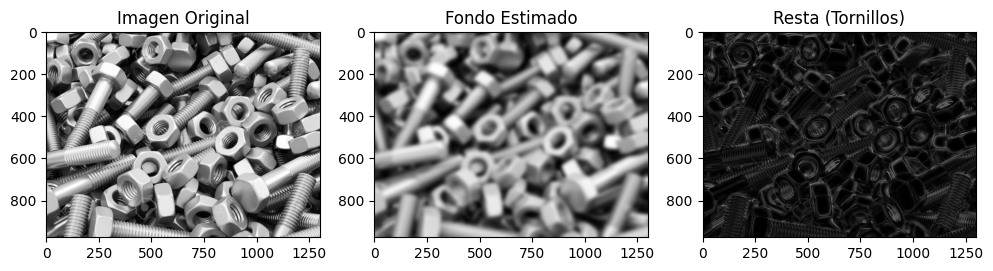

In [7]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
tornillos = cv2.imread("img1.jpg", cv2.IMREAD_GRAYSCALE)

# Simular fondo con desenfoque
fondo = cv2.GaussianBlur(tornillos, (51, 51), 0)

# Resta entre imagen y fondo
resta = cv2.absdiff(tornillos, fondo)

# Mostrar resultados
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(tornillos, cmap="gray"); plt.title("Imagen Original")
plt.subplot(1,3,2); plt.imshow(fondo, cmap="gray"); plt.title("Fondo Estimado")
plt.subplot(1,3,3); plt.imshow(resta, cmap="gray"); plt.title("Resta (Tornillos)")
plt.show()


Ajuste de brillo

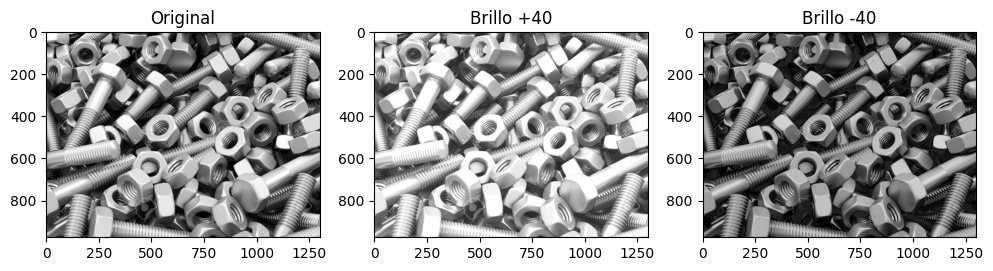

In [8]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen base
img = cv2.imread("img1.jpg")

# Brillo: beta controla la suma o resta de intensidad
brillo_alto = cv2.convertScaleAbs(img, alpha=1, beta=40)   # más brillo
brillo_bajo = cv2.convertScaleAbs(img, alpha=1, beta=-40)  # menos brillo

# Mostrar resultados
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(brillo_alto, cv2.COLOR_BGR2RGB)); plt.title("Brillo +40")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(brillo_bajo, cv2.COLOR_BGR2RGB)); plt.title("Brillo -40")
plt.show()



Ajuste de contraste

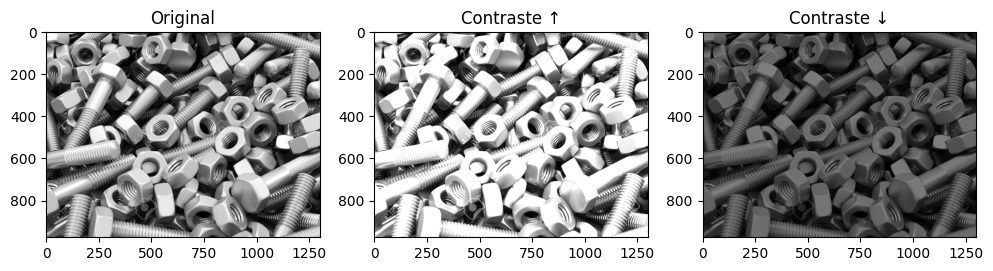

In [9]:
# Contraste: alpha >1 aumenta contraste, entre 0-1 lo reduce
contraste_alto = cv2.convertScaleAbs(img, alpha=1.5, beta=0)  # más contraste
contraste_bajo = cv2.convertScaleAbs(img, alpha=0.5, beta=0)  # menos contraste

# Mostrar resultados
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(contraste_alto, cv2.COLOR_BGR2RGB)); plt.title("Contraste ↑")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(contraste_bajo, cv2.COLOR_BGR2RGB)); plt.title("Contraste ↓")
plt.show()


Filtro Gaussiano

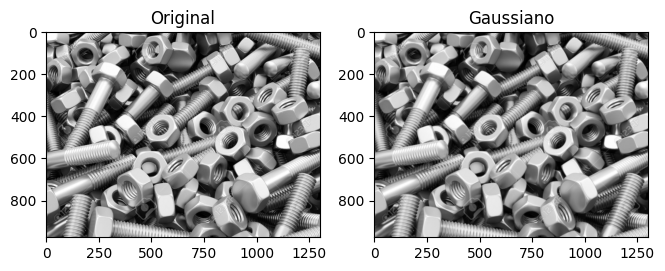

In [18]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread("img1.jpg", cv2.IMREAD_GRAYSCALE)

# Filtro Gaussiano (suaviza el ruido)
gauss = cv2.GaussianBlur(img, (5,5), 0)

# Diferencia entre original y suavizada
diff = cv2.absdiff(img, gauss)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(gauss, cmap="gray"); plt.title("Gaussiano")
plt.show()



Filtro Laplaciano

In [ ]:
# Aplicar Laplaciano (resalta bordes de forma global)
laplaciano = cv2.Laplacian(gauss, cv2.CV_64F)
laplaciano = cv2.convertScaleAbs(laplaciano)

plt.subplot(1,2,1); plt.imshow(gauss, cmap="gray"); plt.title("Gaussiano")
plt.subplot(1,2,2); plt.imshow(laplaciano, cmap="gray"); plt.title("Laplaciano")
plt.show()


Detección de bordes con Canny

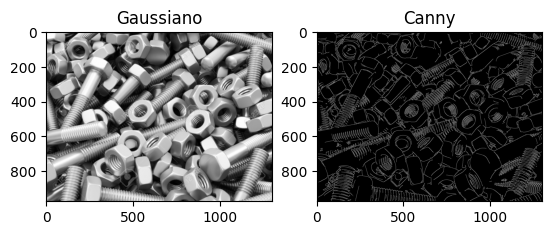

In [15]:
# Canny necesita imagen suavizada
canny = cv2.Canny(gauss, 100, 200)

plt.subplot(1,2,1); plt.imshow(gauss, cmap="gray"); plt.title("Gaussiano")
plt.subplot(1,2,2); plt.imshow(canny, cmap="gray"); plt.title("Canny")
plt.show()
